In [1]:
# Kütüphaneler

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale     # standardizasoyon işlemleri
from sklearn.preprocessing import StandardScaler    # standardizasoyon işlemleri
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from warnings import filterwarnings
filterwarnings("ignore")     # önceki bölümlerde çalıştırdığımızda çıkan gereksiz uyarı mesajları çıkmasın diye

In [3]:
df = pd.read_csv("C:\Makine Öğrenmesi-2\Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[["League" , "Division" , "NewLeague"]])

y = df["Salary"]

x__ = df.drop(["Salary" , "League" , "Division" , "NewLeague"] , axis=1).astype("float64")
x = pd.concat([x__ , dms[["League_N" , "Division_W" , "NewLeague_N"]]] , axis=1)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=42)

# MODEL

In [48]:
rf_model = RandomForestRegressor(random_state=42).fit(x_train , y_train)

# ÖNEMLİ PPARAMETRELER:

# min_samples_leaf = 1 attribute'u => yaprak nıde'daki min gözlem sayısını söylüyor.
# min_samples_split = 2 attribute'u => bir node bölünmeden önce bu node'daki min gözlem sayısını ifade eder. Yani ancak en az bu kadar gözlem varsa bölmeye devam et diyor.
# n_estimator = 10 attribute'u => modelde kullanılacak olan ağaç sayısını belirtiyor. !!!!!!!!!!!!

# TAHMİN

In [49]:
y_pred = rf_model.predict(x_test)
np.sqrt(mean_squared_error(y_test , y_pred))    #ilkel hata oranımızı bulduk. Şimdi doğrulama yaparak asıl oranımızı bulacağız.

344.8191624908484

# MODEL TUNING (DOĞRULAMA)

In [15]:
# grid search ile çaprazlama yapmak için parametreleri belirttik
# max_features -> (bölünmelerde göz önünde bulundurulması gereken değişken sayısını ifade eder.)
# n_estimtor en ideal 500 veya 2000 olma olasılığı çok yüksek

rf_params = {"max_depth": [5,8,10] , "max_features": [1,2,5,10] , "n_estimators": [200,500,1000,2000] , "min_samples_split": [2,10,80,100]} 

In [16]:
# grid search ile çaprazlama yapıyoruz

rf_cv_model = GridSearchCV(rf_model , rf_params , cv=10 , n_jobs= -1 , verbose=2).fit(x_train , y_train) # n_jobs = -1 => işlemci tam kapasite çalışsın

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [17]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [45]:
# FİNAL MODELİMİZ

rf_tuned = RandomForestRegressor(max_depth=8 , max_features=2 , min_samples_split=2 , n_estimators=200).fit(x_train , y_train)

In [46]:
# Final modelimizin test hatasına bakalım

y_pred = rf_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test , y_pred))

343.9907700587953

# DEĞİŞKEN ÖNEM DÜZEYİ
- Modelleme işlemleri sırasında göz önünde bulundurmamız gereken değişkenleri görmek adına imkan sağlıyor

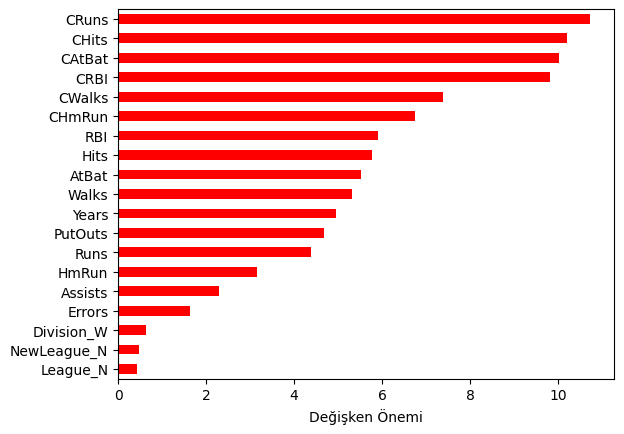

In [52]:
# Örneğin bu modelde değişkenlerin önem düzeyine erişmek istediğimizi düşünelim

# Öncelikle "Importance" ismini verdiğimiz bir dataframe oluşturduk. "'Importance': rf_tuned.feature_importances_*100} " bu kısımda değişkenlerin önemlerinin hesaplamasını yaptırdık ve 100 ile ...
# ... çarparak karşılaştırılabilir bir forma getirdik. Bunları bir sütuna yazdıktan sonra "index = x_train.columns" ile değişkenlerin isimlerini diğer sütüna yazdırdık ve dataframe'i oluşturduk.
# Daha sonra bu değerleri "Importance" datafreme'ini baz alarak sıraladık ve sütun grafiğini çizdirdik

Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100} , index = x_train.columns)
Importance.sort_values(by = 'Importance' , axis=0 , ascending=True).plot(kind= 'barh' , color='r')

plt.xlabel("Değişken Önemi")
plt.gca().legend_ = None
